# Monte-Carlo Simulation for Option Pricing

This notebook simulates the price of an European Call Option, using Monte-Carlo methods

We assume that the underlying stock price follows geomtric brownian motion.

$$dS_t = S_t\mu dt + \sigma S_t dW_t$$

Applying Ito's lemma, we get

$$S_t = S_0 \exp\left(\left(\mu - \dfrac{\sigma^2}{2}\right) t + \sigma W_t\right)$$

where $W_t$ is a Weiner process, or Brownian motion. We could also write it as 

$$\ln(S_t) = \ln(S_0) + \int_0^t \left( \mu - \dfrac{\sigma^2}{2} \right)  dt + \int_0^t \sigma dW_t $$

which makes it easier to work with in python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

In [2]:
# Parameters

S = 100 #stock price S_{0}
K = 110 # strike
T = 1/2 # time to maturity
r = 0.05 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.25 # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials

Text(0.5, 1.0, 'Geometric Brownian Motion')

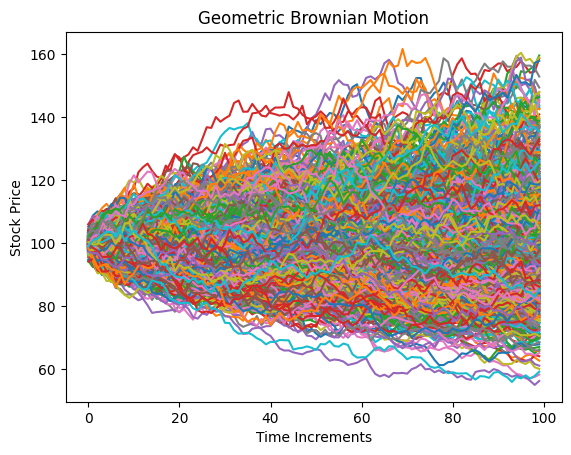

In [3]:
paths= geo_paths(S,T,r, q,sigma,steps,N)

plt.plot(paths)
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")


Alternatively, we can use the [aleatory](https://github.com/quantgirluk/aleatory) library developed by [QuantGirl](https://github.com/quantgirluk/aleatory)

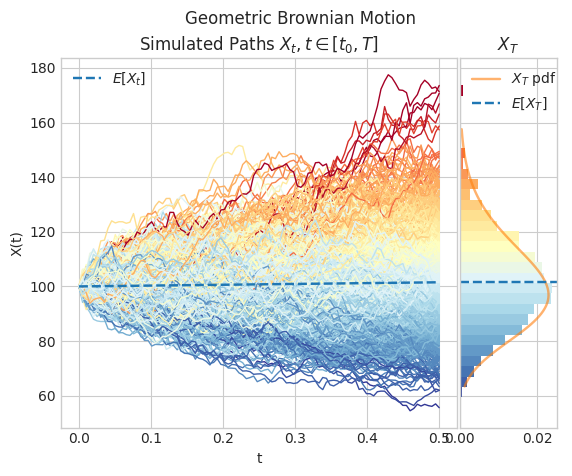

In [4]:
from aleatory.processes import GBM

process = GBM(drift=r-q, volatility=sigma, initial=S, T=T)
fig = process.draw(n=steps, N=N)

## Verifying with Black-Scholes Equation

In [5]:
from scipy.stats import norm

def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call

In [6]:
paths = np.array(process.simulate(n=steps, N=N))
payoffs = np.maximum(paths[:, -1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T)
print('Monte Carlo Simulated price: ', option_price)

Monte Carlo Simulated price:  4.410923001780091


In [7]:
print('Black Scholes Price', black_scholes_call(S, K, T, r, q, sigma))

Black Scholes Price 3.8597599507749933


Since, the number of paths simulated is small, we notice that the simulated price isn't close to the BS Model Price. To solve this, let's run the simulation with more number of paths. This should give a better estimate of the options price. 

Note that this might take upto 1 min to complete.

In [8]:
paths = np.array(process.simulate(n=steps, N=500000))
payoffs = np.maximum(paths[:, -1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T)
print('Monte Carlo Simulated price: ', option_price)

Monte Carlo Simulated price:  3.8634682365889526


In [9]:
print('Black Scholes Price', black_scholes_call(S, K, T, r, q, sigma))

Black Scholes Price 3.8597599507749933
